In [48]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

In [49]:
print('Tendências do Dia: ')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df.head(20))

Tendências do Dia: 
0     /trends/explore?q=Alemanha+x+Hungria&date=now+...
1          /trends/explore?q=Santos&date=now+7-d&geo=BR
2     /trends/explore?q=Botafogo+x+Athletico-PR&date...
3     /trends/explore?q=Fortaleza+x+Gr%C3%AAmio&date...
4     /trends/explore?q=S%C3%A3o+Paulo+x+Cuiab%C3%A1...
5     /trends/explore?q=Esc%C3%B3cia+x+Su%C3%AD%C3%A...
6     /trends/explore?q=Atl%C3%A9tico-GO+x+Crici%C3%...
7     /trends/explore?q=Chico+Buarque&date=now+7-d&g...
8     /trends/explore?q=Alicia+Davis&date=now+7-d&ge...
9           /trends/explore?q=Selic&date=now+7-d&geo=BR
10      /trends/explore?q=Santos+FC&date=now+7-d&geo=BR
11    /trends/explore?q=Jogo+do+Vasco&date=now+7-d&g...
12    /trends/explore?q=Internacional+x+Corinthians&...
13    /trends/explore?q=Alemanha+sele%C3%A7%C3%A3o&d...
14    /trends/explore?q=Cruzeiro+x+Fluminense&date=n...
15           /trends/explore?q=Belo&date=now+7-d&geo=BR
16    /trends/explore?q=Paula+Fernandes&date=now+7-d...
17    /trends/explore?q=Sant

In [50]:
termo = 'ovo de pascoa'

In [51]:
pytrends.build_payload(kw_list=[(str(termo))])

In [52]:
print('Buscando...')
suggestions_dict = pytrends.suggestions(keyword=termo)
pd.DataFrame(data=suggestions_dict).drop('mid', axis=1)

Buscando...


,title,type
0,Ovo De Pascoa Cacau Show Dreams Mil Folhas 400g,Chocolate
1,Ovo de Páscoa Lacta Favoritos 560g,Chocolate
2,Ovo De Pascoa Cacau Show Crocante 280g,Chocolate
3,Black Skull Ovo De Pascoa Protein Brownie Gour...,Linha do produto
4,Ovo De Pascoa Cacau Show Dreams Brigadeiro 400g,Chocolate


In [53]:
pd.DataFrame(data=related_queries_dict['ovo de pascoa']['rising'].head(20))

,query,value
0,ovo de pascoa ursinhos carinhosos,248000
1,ovo de pascoa 2021,41750
2,pascoa 2020,35550
3,ovo de pascoa infantil 2022,34450
4,ovo de pascoa com pantufa,31500
5,ovo de pascoa dos ursinhos carinhosos,22200
6,ovo de pascoa cacau show ursinhos carinhosos,21200
7,ovo de pascoa cacau show pantufa,16550
8,ovo de pascoa ursinhos carinhosos pantufa,12350
9,ovo de pascoa pistache,2700


In [54]:
related_topic = pytrends.related_topics()
related_topic['ovo de pascoa']['rising'].drop(['link','topic_mid'], axis=1)#.head(20)

,value,formattedValue,topic_title,topic_type
0,47400,Aumento repentino,Kopenhagen,Assunto
1,1350,Mais 1.350%,Lindt,Assunto
2,450,Mais 450%,LACTA,Assunto
3,110,Mais 110%,Lacta,Empresa


In [55]:
related_topic = pytrends.related_topics()
related_topic['ovo de pascoa']['top'].drop(['link','topic_mid'], axis=1).head(20)

,value,formattedValue,hasData,topic_title,topic_type
0,100,100,True,Páscoa,Data comemorativa
1,86,86,True,Ovo,Assunto
2,2,2,True,Lacta,Empresa
3,1,1,True,LACTA,Assunto
4,1,1,True,Lindt,Assunto
5,0,<1,True,Kopenhagen,Assunto


<Axes: xlabel='date'>

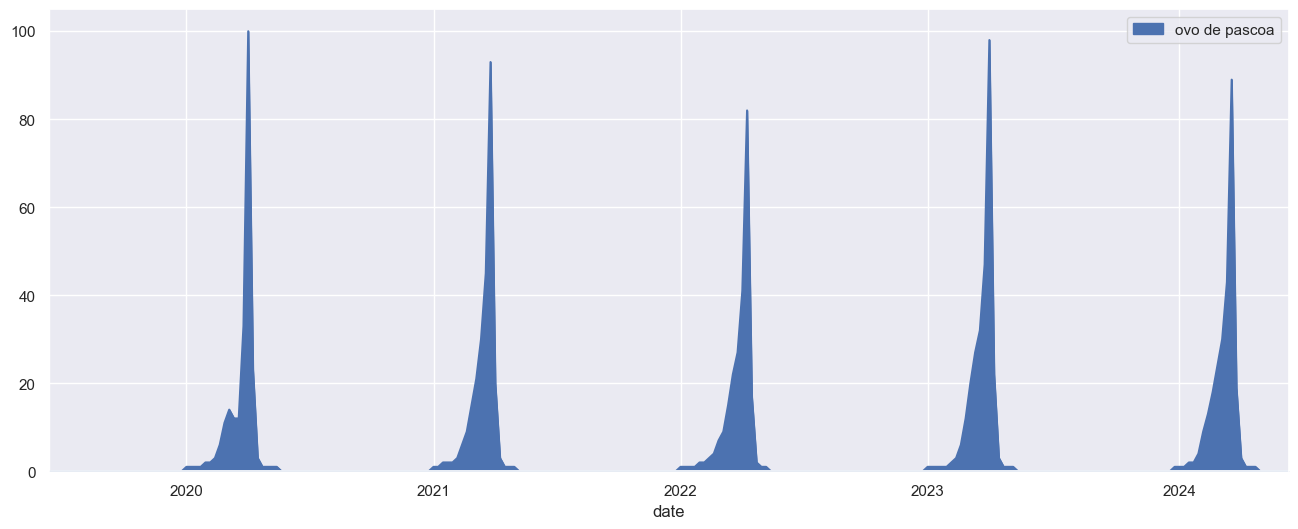

In [56]:
interest_over_time_df[interest_over_time_df.index>=datetime(2019,6,15)]\
.pivot_table(values=['ovo de pascoa'], index='date')\
.plot(kind='area', stacked=True, figsize=(16,6))